In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

df = pd.read_csv("Marketing-Customer-Value-Analysis.csv")

C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [3]:
print("Number of instances: %d" % df.shape[0])
print("Number of features: %d" % df.shape[1])

Number of instances: 9134
Number of features: 24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

<AxesSubplot:>

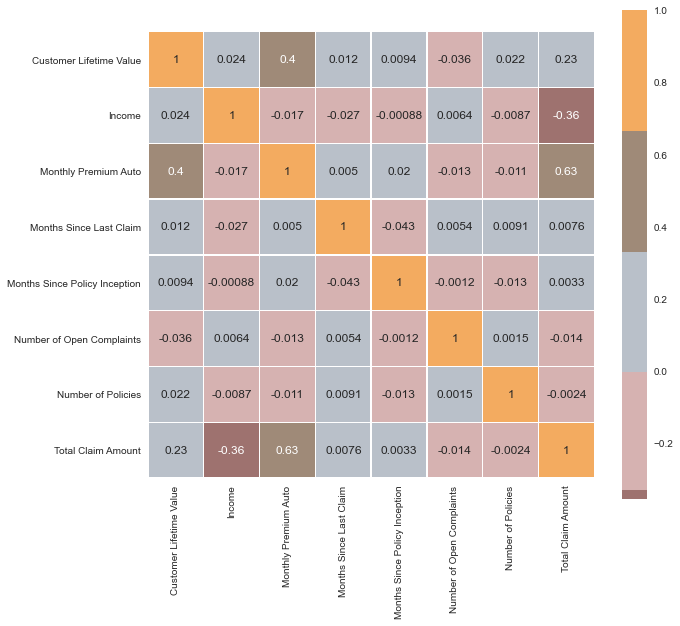

In [5]:
f, ax = plt.subplots(figsize=(10, 10))

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corr_mat = df.corr()

sns.heatmap(corr_mat, square = True, cmap = cmap, annot =True, vmax=None, center=0, linewidths=.5, cbar_kws={"shrink": .9})

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

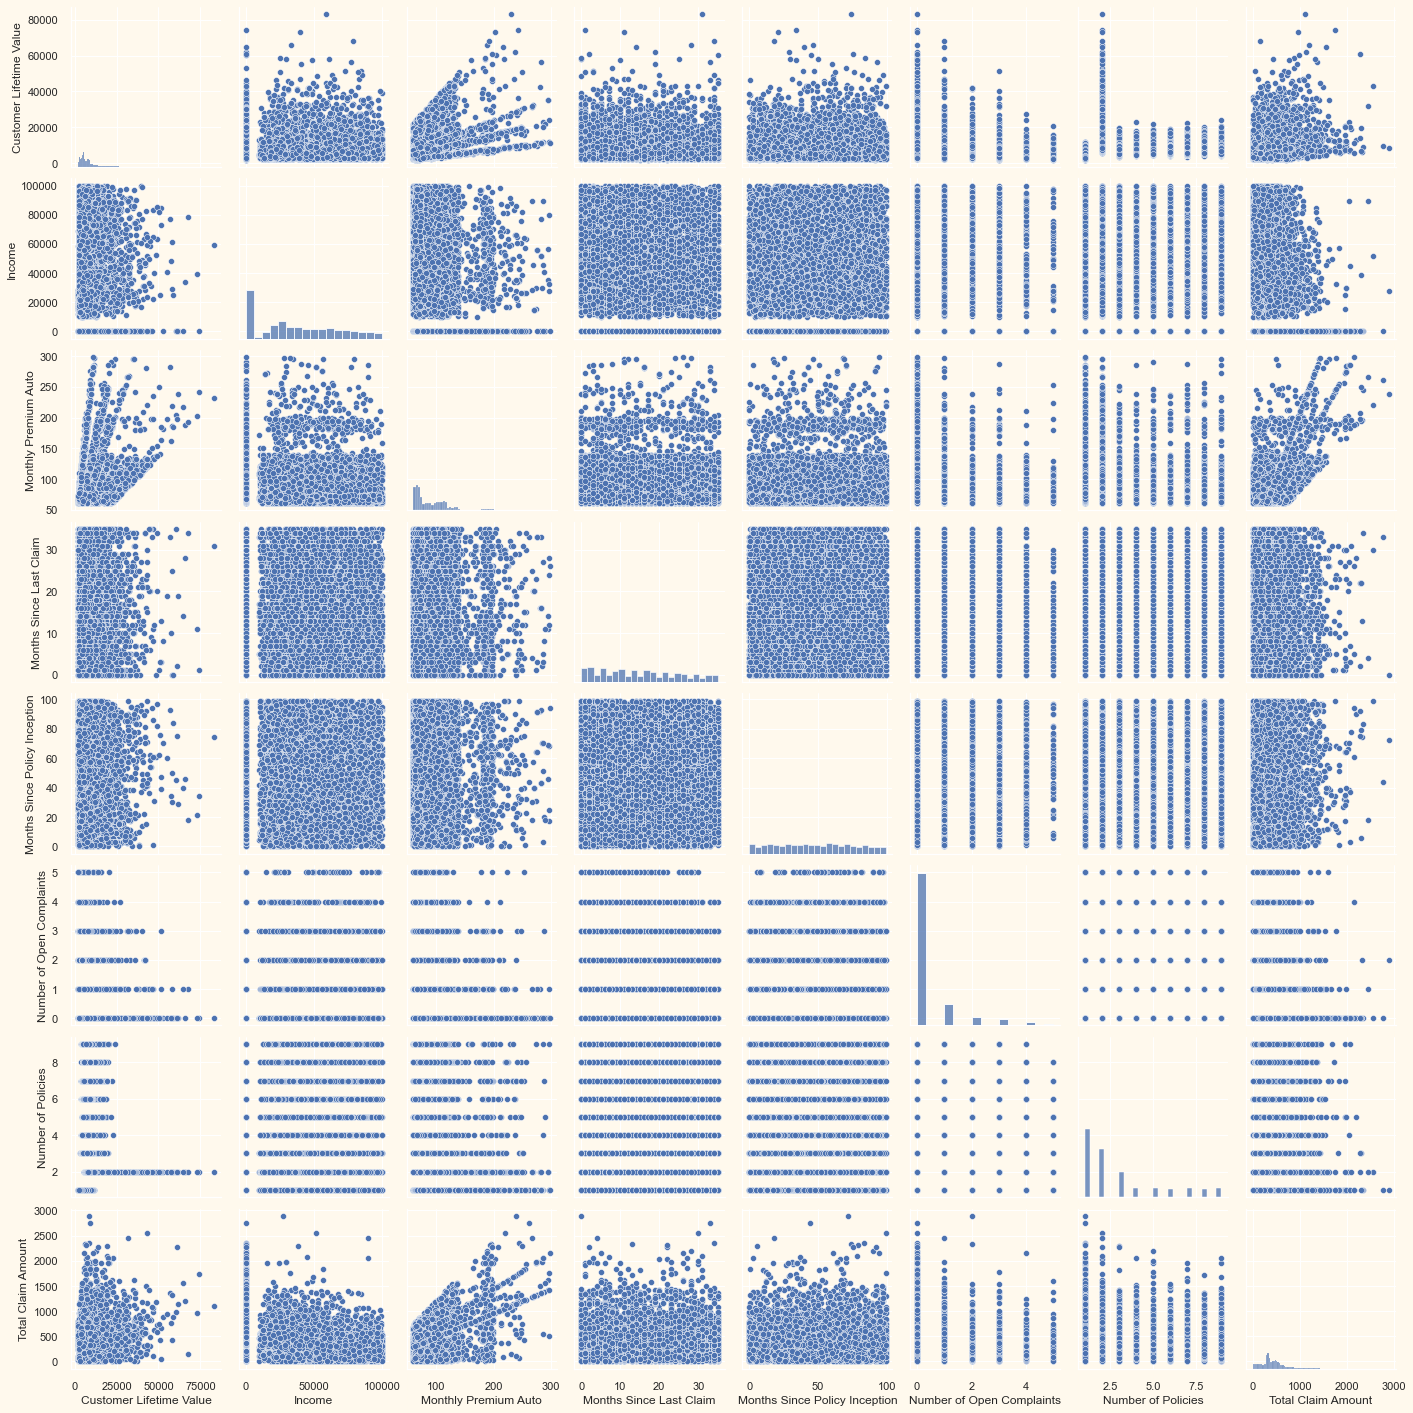

In [6]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df,palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [7]:
df1 = df.copy()

In [8]:
numerical_index = (df1.dtypes != 'object')
numerical_features = list(numerical_index[numerical_index].index)

categorical_index = (df1.dtypes == 'object')
categorical_features = list(categorical_index[categorical_index].index)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

In [10]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df1[categorical_features] = encoder.fit_transform(df1[categorical_features])

In [11]:
df1.head()

Customer  State  Customer Lifetime Value  Response  Coverage  Education  \
0     600.0    4.0                -0.762878       0.0       0.0        0.0   
1    5946.0    0.0                -0.149245       0.0       1.0        0.0   
2      96.0    2.0                 0.710636       0.0       2.0        0.0   
3    8016.0    1.0                -0.052263       0.0       0.0        0.0   
4    2488.0    4.0                -0.755575       0.0       0.0        0.0   

   Effective To Date  EmploymentStatus  Gender    Income  ...  \
0               47.0               1.0     0.0  0.612827  ...   
1               24.0               4.0     0.0 -1.239617  ...   
2               41.0               1.0     0.0  0.365710  ...   
3               12.0               4.0     1.0 -1.239617  ...   
4               52.0               1.0     1.0  0.203390  ...   

   Months Since Policy Inception  Number of Open Complaints  \
0                      -1.543287                   -0.42225   
1                      -0.217334                   -0.42225   
2                      -0.360680                   -0.42225   
3                       0.606907                   -0.42225   
4                      -0.145661                   -0.42225   

   Number of Policies  Policy Type  Policy  Renew Offer Type  Sales Channel  \
0           -0.822648          0.0     2.0               0.0            0.0   
1            2.106160          1.0     5.0               2.0            0.0   
2           -0.404247          1.0     5.0               0.0            0.0   
3            1.687759          0.0     1.0               0.0            2.0   
4           -0.822648          1.0     3.0               0.0            0.0   

   Total Claim Amount  Vehicle Class  Vehicle Size  
0           -0.169640            5.0           1.0  
1            2.400737            0.0           1.0  
2            0.455734            5.0           1.0  
3            0.329769            3.0           1.0  
4           -1.018843            0.0           1.0  

[5 rows x 24 columns]

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df1)
PCA_df = pd.DataFrame(pca.transform(df1), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

count          mean          std          min          25%       50%  \
col1  9134.0 -2.325017e-13  2636.903014 -4566.500003 -2283.250011  0.000232   
col2  9134.0  8.417956e-16    17.017192   -28.733088   -14.643971 -0.576694   
col3  9134.0  7.521415e-17     2.091906    -2.335947    -1.988376 -1.539908   

              75%          max  
col1  2283.250550  4566.500278  
col2    15.269086    29.478048  
col3     2.086969     3.551796

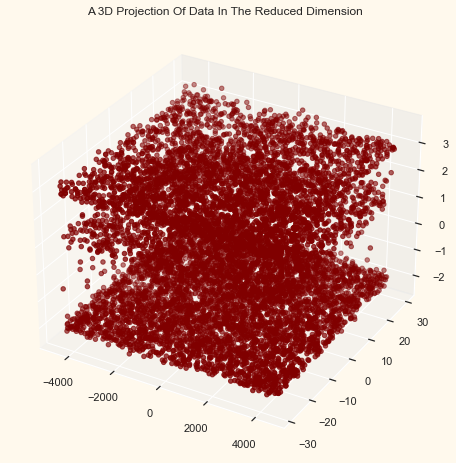

In [13]:
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [26]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


ValueError: could not convert string to float: 'BU79786'

In [32]:
k = 4
model_k = KMeans(n_clusters=k, random_state=0)

km = model_k.fit_predict(PCA_df)

df["KMeansLabel"] = model_k.labels_
df["KMeansLabel"].value_counts()

3    2298
1    2297
2    2280
0    2259
Name: KMeansLabel, dtype: int64

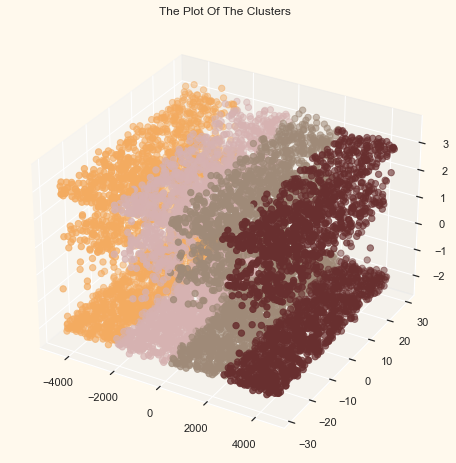

In [33]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df["KMeansLabel"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

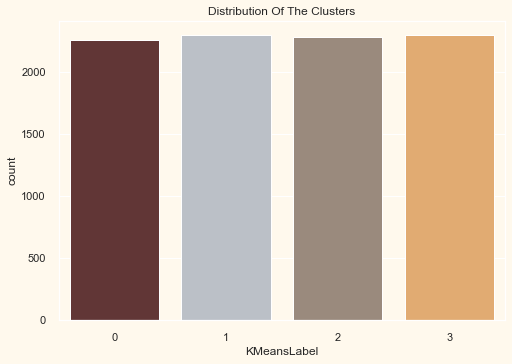

In [34]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["KMeansLabel"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

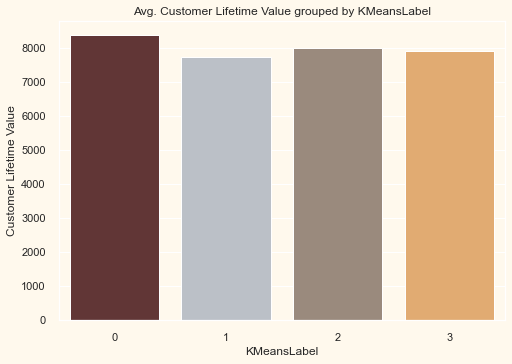

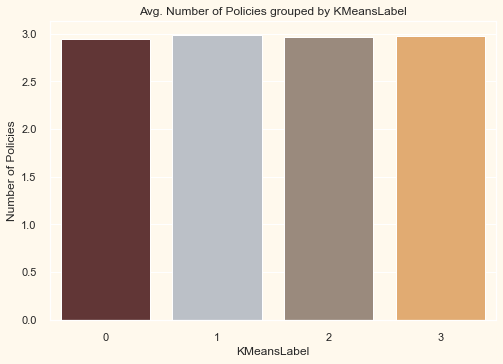

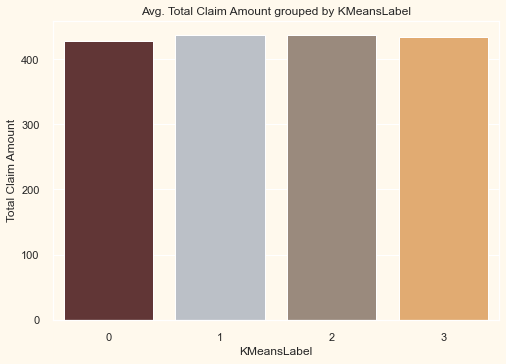

In [18]:
for col in ["Customer Lifetime Value", "Number of Policies", "Total Claim Amount"]:
    temp = pd.DataFrame(df.groupby("KMeansLabel").mean()[col])
    temp.reset_index(inplace=True)
    fig = sns.barplot(data=temp, x="KMeansLabel", y=col, palette = pal)
    fig.set_title("Avg. "+col+" grouped by KMeansLabel")
    plt.show()

In [19]:
df["IncomeGroup"] = pd.cut(df["Income"], [10000, 30000, 50000, 70000, df["Income"].max()], 
       labels=["10K - 30K", "30K - 50K", "50K - 70K", "Above 70K"], ordered=False)
df["IncomeGroup"] = df["IncomeGroup"].astype(str)
df["IncomeGroup"].fillna("Zero Income", inplace=True)

In [20]:
features = ["State", "Education", "EmploymentStatus", "Gender", "Marital Status", "Location Code", "IncomeGroup", "Sales Channel", "Vehicle Class", "Vehicle Size"]

In [21]:
import plotly.express as px

for col in features:
    temp = df.pivot_table(values="Customer", index=["KMeansLabel", col], aggfunc="count")
    temp.reset_index(inplace=True)
    fig = px.bar(temp, x="KMeansLabel", y="Customer", color=col, title="Distribution of "+col+" across Clusters")
    fig.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [23]:
X_numerics = df[['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception',
               'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']]

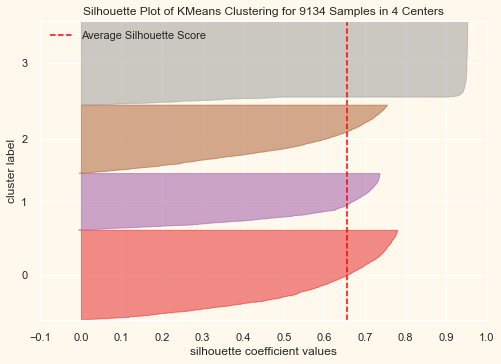

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
model_k = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model_k, random_state=0)
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

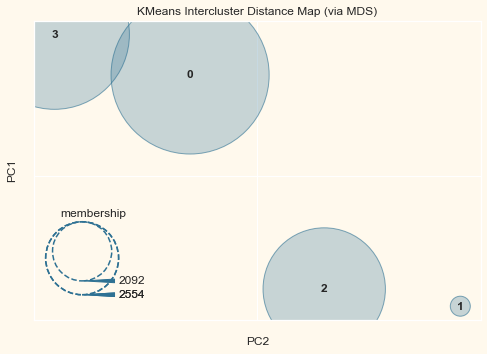

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
from yellowbrick.cluster import InterclusterDistance

model_k = KMeans(n_clusters=4, random_state=0)
visualizer = InterclusterDistance(model_k)

visualizer.fit(X_numerics)        
visualizer.show()